#### Algorithm 5: addition of redundant hyperedges keeping the same fibre partition of the nodes.

In this notebook we will start from a small known hypergraph to visualize it and we will apply Algorithm 5 to obtain a new hypergraph with more hypereges. 

We will test again the partition in fibres of the new hypergraph to test if it is preserved.

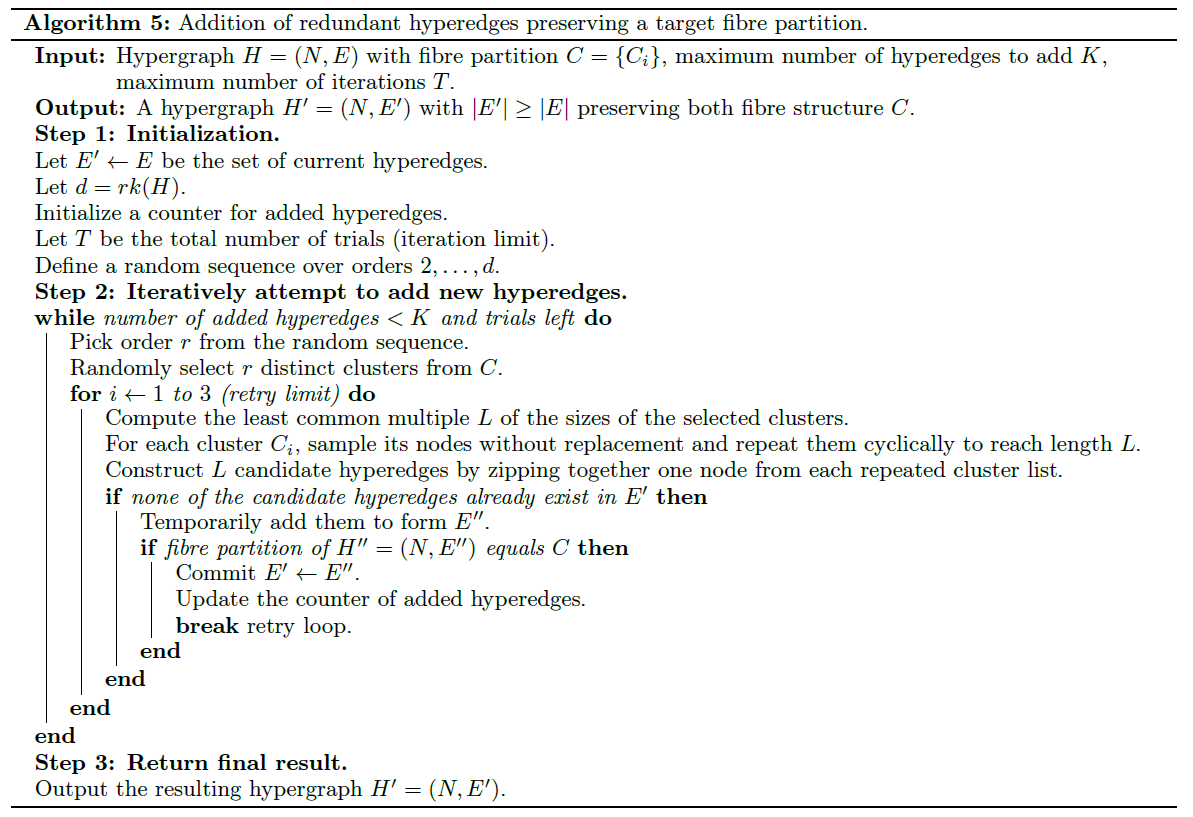

In [12]:
# Libraries
import sys
sys.path.insert(0, '../Utilities')

import networkx as nx

import hypergraphx as hx
from hypergraphx.core.hypergraph import Hypergraph
from hypergraphx.generation.random import random_hypergraph
from hypergraphx.viz import draw_hypergraph

from utilities_fibration import *
from draw_hypergraph_col import *
from hypg_modifications_utilities import *

In [13]:
# Small hypergraph with known structure
edge_list_sc = [[0,1],[1,2],[2,3],[0,2],[3,4],[4,5],[3,5],[0,1,2],[3,4,5],[6,7,8],[1,6]]

# Random hypergraph
## N = 200 
## hpg = random_hypergraph(N, {2: 120, 3: 80})
## sub_hpg = hpg.subhypergraph_largest_component()
## edge_list_sc_filtered_holes = [list(x) for x in sub_hpg.get_edges()]
## edge_list_sc = normalize_sequence(edge_list_sc_filtered_holes)[0]


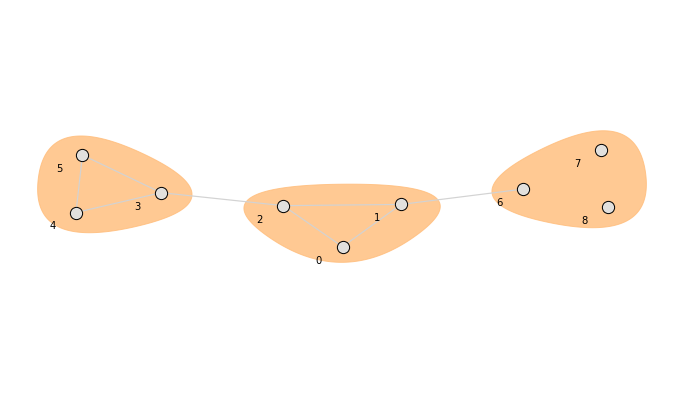

In [14]:
# Create hypergraph and draw it

H =  edge_list_sc

hg = Hypergraph(H)

draw_hypergraph(hg, with_node_labels=True)


In [15]:
# Hypergraph coloring in one step
result_hg_tot = hypergraph_coloring_list([H])

In [16]:
# Extract dictionaries and node clusters as list of lists
edge_name_dict = result_hg_tot[0][2]
edge_col_dict = result_hg_tot[0][1]

node_cluster_hg = {k: v for k, v in result_hg_tot[0][1].items() if k.startswith('N')}
cl_hg = []
# Consider the node partition for the hypergraph
for val in set(node_cluster_hg.values()):
    cl_hg.append([k for k, v in node_cluster_hg.items() if v == val])

dic = {v: edge_col_dict[k] for k, v in edge_name_dict.items()}

list_c = cl_hg

# Transform the list of the node cluster substituting with the original names
clusters = [[edge_name_dict[item] for item in sublist] for sublist in list_c]    
clusters   

[[2], [4, 5], [3], [0], [1], [7, 8], [6]]

In [17]:
hyperedges, color_dict, node_map = result_hg_tot[0]

In [18]:
# Apply the function to add structured redundant hyperedges preserving fibers

enhanced_result = add_structured_redundant_hyperedges_preserving_fibers(
    hyperedges,
    color_dict,
    node_map,
    clusters,
    max_new_hyperedges=10,
    max_order=3
)

Failed to add valid batch of order 2 after 3 node selections.
Added 2 hyperedges of order 3 connecting clusters [3, 1, 4].
Added 2 hyperedges of order 2 connecting clusters [4, 1].
Added 1 hyperedges of order 3 connecting clusters [3, 0, 6].
Added 1 hyperedges of order 2 connecting clusters [2, 4].
Added 2 hyperedges of order 3 connecting clusters [1, 0, 5].
Failed to add valid batch of order 2 after 3 node selections.
Added 2 hyperedges of order 3 connecting clusters [5, 3, 6].


In [19]:
# New hyperedges list
enhanced_result[0]

[[0, 1],
 [1, 2],
 [2, 3],
 [0, 2],
 [3, 4],
 [4, 5],
 [3, 5],
 [0, 1, 2],
 [3, 4, 5],
 [6, 7, 8],
 [1, 6],
 [0, 5, 1],
 [0, 4, 1],
 [1, 5],
 [1, 4],
 [0, 2, 6],
 [3, 1],
 [4, 2, 7],
 [5, 2, 8],
 [7, 0, 6],
 [8, 0, 6]]

In [20]:
en_hyperedges = enhanced_result[0]
print(f'New length: {len(en_hyperedges)}')
print(f'Original length: {len(hyperedges)}')

New length: 21
Original length: 11


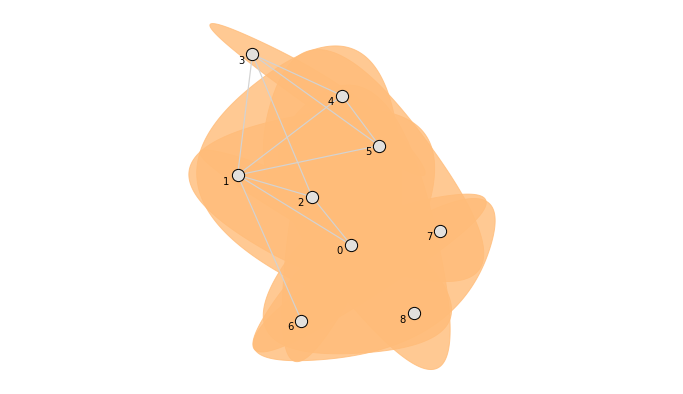

In [21]:
# Visualize the new hypergraph
hg = Hypergraph(en_hyperedges)

draw_hypergraph(hg, with_node_labels=True)

In [22]:
# Compare the clusters before and after pruning

result_hg_tot_p = hypergraph_coloring_list([en_hyperedges])
edge_name_dict_p = result_hg_tot_p[0][2]
edge_col_dict_p = result_hg_tot_p[0][1]

node_cluster_hg_p = {k: v for k, v in result_hg_tot_p[0][1].items() if k.startswith('N')}
cl_hg_p = []
for val in set(node_cluster_hg_p.values()):
    cl_hg_p.append([k for k, v in node_cluster_hg_p.items() if v == val])

dic_p = {v: edge_col_dict_p[k] for k, v in edge_name_dict_p.items()}
list_c_p = cl_hg_p
clusters_pruned = [[edge_name_dict_p[item] for item in sublist] for sublist in list_c_p]

set_pruned = set(frozenset(inner) for inner in clusters_pruned)
set_original = set(frozenset(inner) for inner in clusters)

print(clusters_pruned)
print(clusters)

set_pruned == set_original

[[0], [6], [2], [4, 5], [1], [7, 8], [3]]
[[2], [4, 5], [3], [0], [1], [7, 8], [6]]


True